## 2.1 The way out

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
M=np.load('maze.npy')
M.shape

(100, 100)

Text(0.5, 1.0, 'M')

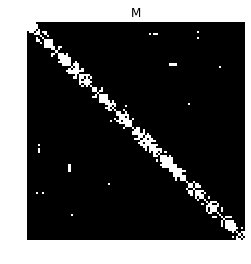

In [3]:
plt.imshow(M,cmap='gray')
plt.axis('off')
plt.title('M')

In [3]:
trans=M.copy()
trans[np.arange(len(M)),np.arange(len(M))]=np.zeros(len(M))
#trans=np.divide(trans, np.count_nonzero(trans,axis=0), out=np.zeros_like(trans), where=M.sum(1)!=0)
trans=trans[None,:]/np.count_nonzero(trans,axis=0).reshape(-1,1)
trans[trans!=trans]=0
trans=trans[0]
trans[trans.sum(0)==0,trans.sum(0)==0]=1

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [155]:
k=1
trans_k=np.identity(len(trans))
while k<90:
    trans_k=np.matmul(trans_k,trans)
    print(k,trans_k[0,99])
    k+=1
#print(k)

1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 1.4329805996472663e-07
14 5.568415637860081e-07
15 1.544894809775762e-06
16 3.354766402874592e-06
17 6.364477921414661e-06
18 1.085866447156589e-05
19 1.7191597564107407e-05
20 2.5607102469972937e-05
21 3.63732275513629e-05
22 4.964913675904288e-05
23 6.55929425300808e-05
24 8.426728997975723e-05
25 0.00010572373650498458
26 0.00012993701940574887
27 0.00015686988282116835
28 0.00018642757076100288
29 0.00021850687623115503
30 0.0002529645542135158
31 0.00028965394179507315
32 0.00032840285235689653
33 0.00036904058447585547
34 0.0004113822602558503
35 0.0004552485118185966
36 0.0005004542145857071
37 0.0005468226647531377
38 0.0005941773330047172
39 0.0006423519432726365
40 0.0006911843256700329
41 0.0007405234775085019
42 0.0007902248962769884
43 0.0008401554415789685
44 0.0008901897294821779
45 0.0009402134089627828
46 0.0009901203319469666
47 0.0010398146998065875
48 0.00108920881178084
49 0.0011382244166

In [4]:
def num_of_doors(i,j):
    k=1
    trans_k=trans
    while trans_k[i,j]==0:
        trans_k=np.matmul(trans_k,trans)
        k+=1
    return k

In [5]:
num_of_doors(0,99)

13

In [110]:
#returns list of paths with an extra step
def find_paths(i,j,p):
    A=np.linalg.matrix_power(trans,p)
    C=A@trans
    if C[i,j]!=0:
        nnz=[]
        for k in range(len(trans)):
            if A[i,k]!=0 and trans[k,j]!=0:
                nnz.append(k)
        return nnz
    else:
        return False


def search_door(i,j,p,path,final_paths):
    if p==-1:
        return path
    nnz=find_paths(i,j,p)
    if nnz==False:
        return 
    #split paths in all possibilities
    paths=[path.copy() for _ in range(len(nnz))]
    #print(p,len(final_paths),path,paths,nnz)
    for k in range(len(nnz)):
        paths[k].append(nnz[k])
    if paths:
        for d in range(len(nnz)):
            #children.append()
            #print(p,d,len(nnz),len(paths),nnz,path,paths)
            child_d=search_door(i,nnz[d],p-1,paths[d],final_paths)
            #print('child',child_d,p,d)
            paths[d]=child_d
        #delete all paths that didn't lead to i
        if p==0:
            final_paths.extend(paths)
            #print(path)
    else:
        #print(p,'impossible')
        return False

In [113]:
def shortest_path(i,j,q=None):
    if q is None:
        q=num_of_doors(i,j)-1
    path=[j]
    paths = []
    search_door(i,j,q,path,paths)
    if paths:
        return np.unique(paths,axis=0)
    else:
        return None
#for p in range(12,0,-1):
#    sear

In [90]:
path=shortest_path(0,99)
path

array([[99, 96, 94, 91, 89, 85, 84, 83, 80, 77, 78,  4,  1,  0],
       [99, 96, 94, 91, 89, 85, 84, 83, 80, 77, 78,  4,  2,  0],
       [99, 96, 94, 91, 89, 85, 84, 83, 80, 79, 78,  4,  1,  0],
       [99, 96, 94, 91, 89, 85, 84, 83, 80, 79, 78,  4,  2,  0],
       [99, 96, 94, 91, 89, 86, 84, 83, 80, 77, 78,  4,  1,  0],
       [99, 96, 94, 91, 89, 86, 84, 83, 80, 77, 78,  4,  2,  0],
       [99, 96, 94, 91, 89, 86, 84, 83, 80, 79, 78,  4,  1,  0],
       [99, 96, 94, 91, 89, 86, 84, 83, 80, 79, 78,  4,  2,  0],
       [99, 96, 94, 92, 89, 85, 84, 83, 80, 77, 78,  4,  1,  0],
       [99, 96, 94, 92, 89, 85, 84, 83, 80, 77, 78,  4,  2,  0],
       [99, 96, 94, 92, 89, 85, 84, 83, 80, 79, 78,  4,  1,  0],
       [99, 96, 94, 92, 89, 85, 84, 83, 80, 79, 78,  4,  2,  0],
       [99, 96, 94, 92, 89, 86, 84, 83, 80, 77, 78,  4,  1,  0],
       [99, 96, 94, 92, 89, 86, 84, 83, 80, 77, 78,  4,  2,  0],
       [99, 96, 94, 92, 89, 86, 84, 83, 80, 79, 78,  4,  1,  0],
       [99, 96, 94, 92, 8

In [105]:
def path_prob(path):
    if path is None:
        return 0.0
    prob=1
    for i in range(len(path)-1):
        prob*=trans[path[i],path[i+1]]
    return float(prob)

In [107]:
path_prob(path)

9.185773074661961e-09

In [116]:
i,j=0,99
for q in range(11,20):
    paths=shortest_path(i,j,q)
    max_prob,max_path=0,[]
    if paths is None:
        continue
    for path in paths:
        curr_path_prob=path_prob(path)
        if curr_path_prob>max_prob:
            max_path=path
            max_prob=curr_path_prob
    print(q+1,'\t',max_prob,max_path)

13 	 1.148221634332745e-08 [99 96 94 91 89 85 84 83 80 79 78  4  1  0]
14 	 5.741108171663725e-09 [99 96 94 91 89 85 84 83 80 79 78  7  4  1  0]
15 	 5.741108171663725e-09 [99 97 99 96 94 91 89 85 84 83 80 79 78  4  1  0]
16 	 2.8705540858318625e-09 [99 97 99 96 94 91 89 85 84 83 80 79 78  7  4  1  0]
17 	 2.8705540858318625e-09 [99 97 99 97 99 96 94 91 89 85 84 83 80 79 78  4  1  0]


KeyboardInterrupt: 

The shortest path is also the most propable

## 2.2 Expected traversal time

Find the nearest neighbors (NN) for the i-th vertex, where $N_i$ is the number of nearest neighbors
$$h_{i,j}=1+\frac1{N_i}\sum_{k=1}^{\text{NN}(i)}h_{k,j}$$
with the property
* $h_{i,i}=0\quad\forall i$

this gives a linear equation system.

In [119]:
H=trans-np.identity(len(trans))

In [124]:
np.linalg.lstsq(H,-np.ones(len(trans)))[0][-1]

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


49030509228928.51